# FUNDAMENTALS OF DATA ANALYSIS WITH PYTHON <br><font color="crimson">DAY 4: DATA VISUALIZATION</font>

49th [GESIS Spring Seminar: Digital Behavioral Data](https://training.gesis.org/?site=pDetails&pID=0xA33E4024A2554302B3EF4AECFC3484FD)   
Cologne, Germany, March 2-6 2010

## Course Developers and Instructors 

* Dr. [John McLevey](www.johnmclevey.com), University of Waterloo (john.mclevey@uwaterloo.ca)     
* [Jillian Anderson](https://ca.linkedin.com/in/jillian-anderson-34435714a?challengeId=AQGaFXECVnyVqAAAAW_TLnwJ9VHAlBfinArnfKV6DqlEBpTIolp6O2Bau4MmjzZNgXlHqEIpS5piD4nNjEy0wsqNo-aZGkj57A&submissionId=16582ced-1f90-ec15-cddf-eb876f4fe004), Simon Fraser University (jillianderson8@gmail.com) 

<hr>

## <i class="fa fa-tasks"></i> LEARNING OBJECTIVES

By the end of the day, you should be able to: 

1. Explain why considerations about human perception are essential to producing good graphics 
2. Understand the difference between aesthetic, substantive, and perceptual problems with graphics 
3. Describe the pros and cons of different approaches to encoding quantitative information with visual elements, such as points, lines, shapes, and colour (luminance, hue, and vibrancy)
4. Make defensible decisions about what kinds of graphs to produce, and how to design the lower-level components of graphs
5. Adopt a "design thinking" approach to visualization that emphasizes the effective communication of specific messages to specific audiences (think *what* you are trying to communicate to *whom* and *for what purpose*)
6. Translate these more conceptual issues into actual visualizations, produced with `matplotlib` and `seaborn`
7. Produce and modify the following common types of graphs: 
    * Bar graphs + Cleveland dot plots 
    * Histograms + kernel density estimates 
    * Boxplots + dot and whisker plots 
    * Scatterplots 
    * Time series 
    * Add text and other annotations to plots 
    * Pair plots and other small multiples
    * Model-based visualizations   
8. Save visualizations in formats that are appropriate for the web or for print

Learning objectives 1-5 are, of course, independent of the tools you use to develop your visualizations. They are, in many respects, the most important. However, given the nature of this course we will only introduce them briefly and then move on to the practical matter of designing, coding, and improving visualizations in Python. We will spend most of our time on objectives 6 - 8. 

## <i class="fa fa-map-o"></i> PLAN FOR THE DAY

<i class="fa fa-location-arrow"></i> [Principles and best practices](#prin)      
<i class="fa fa-location-arrow"></i> [Design thinking for effective visualization](#design)     
<i class="fa fa-location-arrow"></i> [`matplotlib` and `pyplot`](#mpl)     
<i class="fa fa-location-arrow"></i> [Counts, ranks, and distributions](#crd)     
<i class="fa fa-location-arrow"></i> [Relationships](#relationships)     
<i class="fa fa-location-arrow"></i> [Time series](#time)     
<i class="fa fa-location-arrow"></i> [Small multiples](#multiples)     
<i class="fa fa-location-arrow"></i> [Annotations](#annotations)     
<i class="fa fa-location-arrow"></i> [Refining and saving plots for publication](#publication)     

<hr>

# <i class="fa fa-terminal"></i> PACKAGES & DATASETS 

Most of what we will do today makes heavy use of `pandas`, `matplotlib`, and `seaborn`. 

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

As you will learn towards the end of the session, there is an important distinction between "raster" graphics and "vector" graphics. By default, Jupyter will display low resolution raster graphics because the file sizes are small, so load quickly in our browsers. The downside is that they look *terrible*. Instead, we will use the line `%config InlineBackend.figure_format = 'svg'` to force Jupyter to display our graphs as `svg`s. *This has no impact on how graphs look when they are written to disk*. Regardless of the way graphs are displayed inside the Jupyter notebook, we will learn how to save high quality graphs for publication at the end of the notebook.  

In [2]:
%config InlineBackend.figure_format = 'svg' # better resolution with vector graphics! 

As before, we will use the Russian Troll Tweets dataset. We will pull a random sample of 5,000 observations (Tweets). We will go back and forth between the full dataset and the sampled dataset in this notebook. Most of the time we will use the sample, as it allows us to work faster and reduces problems such as overplotting. 

In [4]:
data_dir = os.listdir('data/russian-troll-tweets')

files = [f for f in data_dir if 'csv' in f]
df = pd.concat((pd.read_csv('data/russian-troll-tweets/{}'.format(f), encoding='utf-8', low_memory=False) for f in files), ignore_index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2946207 entries, 0 to 239349
Data columns (total 21 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   external_author_id  object
 1   author              object
 2   content             object
 3   region              object
 4   language            object
 5   publish_date        object
 6   harvested_date      object
 7   following           int64 
 8   followers           int64 
 9   updates             int64 
 10  post_type           object
 11  account_type        object
 12  retweet             int64 
 13  account_category    object
 14  new_june_2018       int64 
 15  alt_external_id     object
 16  tweet_id            int64 
 17  article_url         object
 18  tco1_step1          object
 19  tco2_step1          object
 20  tco3_step1          object
dtypes: int64(6), object(15)
memory usage: 494.5+ MB


In [5]:
sampled = df.sample(5000) # we will pull a random sampling to help with overplotting and to avoid slowing down the browser

# <i class="fa fa-location-arrow"></i> PRINCIPLES & BEST PRACTICES <a id='prin'></a>

Like other types of data analysis, effective data visualization requires adopting an iterative approach. This iterative approach should always be guided by a fairly general set of principles and best practices. A full discussion of those principles and best practices is beyond the scope of this course, but we will briefly present some of the most important considerations here. In our experience, the best way to start is by thinking carefully about what you want to learn about your data (if you're doing exploratory data analysis), or what you want to communicate (if you're producing a graph for publication).  

First, though it might seem obvious, it is easy to forget that there are many ways to visualize patterns in our data and that some ways are better than others. What makes any particular visualization better than another? 

As Kieran Healy points out, "bad graphs" tend to be bad for one of three reasons:

1. **Aesthetics**: there are a lot of unnecessary details or modifications, usually done in poor taste (e.g. unnecessary 3D effects, shadows, rotated axes, etc.). These "infographic" approaches to visualization may be more memorable but are extremely difficult to interpret correctly.   
2. **Substantive data problems**: the graph *looks* good and follows best practices, but the data themselves are bad or have been incorrectly processed, sending a misleading message.
3. **Being inattentive to the realities of human perception**, and therefore making poor visualization choices that may mislead you or your readers. 

> "Visualization encodes numbers in lines, shapes, and colours. That means our interpretation of these encodings is partly conditional on how we perceive geometric shapes and relationships generally. We have known for a long time that poorly encoded data can be misleading." 
>
> Kieran Healy (2018) *Data Visualization*, page 11. 

It is *essential* to keep in mind realities about how **perception** and the **human vision system** work. Perception is far more complicated than simply creating a 1:1 mental representation of what we are looking at. To appreciate this reality, think of the many examples of visual effects and optical illusions. 

Perhaps the most fundamental issue is that we have an easier time perceiving some colours, shapes, and relationships than others. As a result, some visualizations -- such as pie charts, tree maps, and stacked bar charts -- are total non-starters. You should avoid using them at all costs. But even setting aside these extreme examples of bad graphs, knowledge of perception and vision can help you make visualization decisions that reduce the risk of fooling yourself and other people. We will discuss some of these factors shortly. 

A second and related factor is that we have a tendency to see structure and patterns in data even when those patterns are not in fact meaningful. For this reason, it is usually a mistake to rely on visualization techniques without simultaneously doing some sort of statistical modelling (*just as it is a mistake to model your data without visualizing it*). Statistical modelling is beyond the scope of this course but we want to be very clear that it is best to pursue these two types of analysis simultaneously. 

There is a sizeable empirical literature on perception and statistical visualization. For the most part, this literature builds on Bill Cleveland's groundbreaking work in the 1980s and 1990s. Psychologists, statisticians, and applied data analysts have documented many specific factors that increase or decrease the probability of drawing an incorrect conclusion from a graph. These include: 

* Selecting the wrong colour palette increases the chance of misperception (e.g. it is diverging when it should be qualitative, it is not colour-blind friendly, etc.) 
* Using area or angles to represent important properties increases the chance of misperception because humans are inherently bad at comparing minor differences in angle and area to modest ones). 
* Using length and position increase the chance of *correct* perceptions because humans are very good at comparing differences in length and position. When designing visualizations, think of length and position first. 

There are many other things to consider but for now, we offer the following *strong opinions* about visualizing data. 

Never use pie charts for any reason whatsoever, as the combination of angles, area, and a non-linear axis make it *extremely* likely that a reader will interpret your graph incorrectly. 

Avoid tree maps, stacked bar charts, bubble charts, and other similar plots that require comparing areas. The issue with stacked bar charts is that each block has a different baseline / starting point in each bar. Given how bad we are at comparing area, this makes it far more likely that your reader will interpret your graph incorrectly. The issue with bubble charts is slightly more complex. Sometimes it *can* be effective to change the size of nodes in a scatterplot but you should be very careful when you do this and you should not expect a reader to perceive relatively small differences in the area of any given pair of points.

*Most of the time*, bar graphs and dot plots should have a $y$-axis that starts at 0 but *contrary to common wisdom*, there are some **rare** cases when this is not the best choice. Default to axes that start at 0 but don't be too ideological about this. Again, know exactly what you want to show and why. If you want to be instantly discredited by a quantitatively-literate reader, exaggerate differences between the observations by manipulating the range of the y-axis. *Don't do this!* 🤨

If you are comparing distributions or counts in a small multiples visualization, you should have each small plot share $x$ and $y$ axes with the other small plots. 

In general, less ink is better than more ink. Simplify as much as possible, but no more. 

Resist the temptation to use 3D effects on all graphs, including scatterplots. 

If you have to add a third dimension to a graph, consider using either colour or shape. It is almost never useful to use both at the same time. 


The dimensions -- or aspect ratio -- of a line plot have a *huge* effect on our perception of slope / rate of change. Exercise extreme care, and above all do not intentionally mislead your readers. 

Do not vary colour or shape unless you are encoding values in colours and shapes. For example, if you assign the bars in a bar plot different colours and the differences in colour are not meaningful, they might look good but increase the chances of misperception. Resist the temptation! 

Avoid the temptation to make manual modifications to graphs. For the sake of reproducibility and transparency, you should do *everything* programatically. `matplotlib` makes this possible. 

Finally, if possible, ask other people to critique your visualizations. It can take some time to develop a reliable style that balances information density and visual minimalism, while reducing the chances of misperception. Our recommendation is that you do this by adopting a "design thinking" approach to data visualization. 


# <i class="fa fa-location-arrow"></i> DESIGN THINKING FOR EFFECTIVE VISUALIZATION <a id='design'></a>

Simply knowing about cognitive biases, vision effects, and optical illusions does not make us less susceptible to them, because we do not have that kind of conscious control over our visual system and neurological processes. So what can we do to mitigate their effects? 

We recommend that you take a "design thinking" approach to creating visualizations. There are many design thinking frameworks and in theory they are all equally relevant. All we really mean here is that, like any other type of designer, you should (1) always know what problem you are trying to solve, (2) embrace an iterative approach to improving your design, (3) explicitly put yourself in the position of your reader, and (4) prioritize clear and effective communication. 

Finally, empirical research on perception and statistical visualizations suggests that the vast majority of people draw incorrect conclusions from most types of graphs. Yes, this is a depressing reality. 🙁 We think this is even more reason to adopt an explicit design thinking approach. When you intentionally adopt the perspective of a reader, you should assume they will make at least some mistakes when interpreting your graph. What can you do to make the message as clear and accurate as possible? *What **exactly** do you want a reader to know about your data?* 

We will conclude this section with one final quote from Kieran Healy (2018) *Data Visualization*: 

> "“[B]ear in mind that these different channels or mappings for data [e.g. lines, shapes, colours] are not in themselves kinds of graphs. They are just the elements or building blocks for graphs. When we choose to encode a variable as a position, a length, an area, a shade of grey, or a colour, we have made an important decision that narrows down what the resulting plot can look like. But this is not the same as deciding what type of plot it will be, in the sense of choosing whether to make a dot plot or a bar chart, a histogram or a frequency polygon, and so on.""
> 
> Kieran Healy (2018) *Data Visualization*, page 27. 

# <i class="fa fa-location-arrow"></i> `matplotlib`, `pyplot`, and `seaborn` <a id='mpl'></a>

The main visualization package in Python is `matplotlib`. `matplotlib` itself provides an *enormous* amount of power to the researcher and has a well-earned reputation for complexity. Entire books have been written on the architecture of `matplotlib`. 

The good news is that it is possible to produce extremely high-quality visualizations without having to learn all there is to know about `matplotlib`. In fact, the vast majority of visualizations you would want to produce in a research context can be produced using `pyplot` and `seaborn`, which sit on top of `matplotlib` and make it as easy as possible to produce all common statistical visualizations. `matplotlib`, `pyplot` and `seaborn` code can all be mixed together to produce visualizations, which makes it possible to customize your plots in almost any way you can imagine. And if you really want to do something unusual, `matplotlib` can handle it -- you just need to learn more about its architecture. 

In this notebook, nearly all plots will be constructed with `pyplot`, which we imported earlier as `plt`. In some cases, we will also draw on `seaborn`, which we imported as `sns`. 

## Anatomy of a Figure

Below, we will always begin a new figure by initializing a `figure` object and an `axes` object. You can think of the former as the empty canvas that will hold our figure. The latter -- the `axes` object, which consists of axes on a grid system -- is what actually does the plotting. We can create both of these objects by calling the `subplots` command. If we do not provide any arguments, it will produce a single graph. Alternatively, we can provide arguments that will partition the figure canvas into a series of smaller graphs.  

Once our `figure` and `axes` objects have been created, we can use `pyplot` and `seaborn` commands to actually plot our data. Some of the many options, all demonstrated below, include: 

* `plot`, to draw lines or points
* `scatter`, to draw unconnected points, scaled or coloured
* `bar`, to draw vertical rectangles (constant width)
* `barh`, to draw horizontal rectangles (constant height)
* `axvline` and `axhline` to draw horizontal and vertical lines across axes

In each of the examples below, we follow a generic process for producing a visualization. We start with any necessary data preparation, such as grouped operations. Then we initialize our `figure` and `axes` object using the `subplots()` command. Next, we use plotting commands to draw lines, points, bars, and so on. We then customize the plot by making modifications to each of the objects created to this point. Finally, we either show the plot in the browser, or we save it to a file. 

We go through these steps iteratively for each of the graphs below. We will iterate slowly at first, introducing very small changes one at a time. Gradually, we will start to move faster. 

A final note: here, we "iterate" on our visualizations by adding new code to some baseline plotting code. We do this in differnet code cells. In a real project, we would work in one cell, tweaking our code as we go. That approach doesn't really work in a teaching context, for obvious reasosn. In practice, you do not need this much code to produce good visualizations. 

# <i class="fa fa-location-arrow"></i> COUNTS, RANKS, AND DISTRIBUTIONS <a id='crd'></a>

## Bar Graphs

In [6]:
cat_counts = sampled.groupby('account_category').size()
cat_counts

account_category
Commercial       204
Fearmonger        15
HashtagGamer     410
LeftTroll        741
NewsFeed        1001
NonEnglish      1397
RightTroll      1212
Unknown           20
dtype: int64

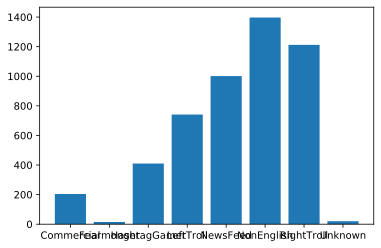

In [7]:
fig, ax = plt.subplots()
ax.bar(cat_counts.index, cat_counts)
plt.show()

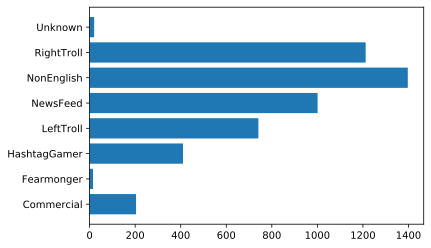

In [8]:
fig, ax = plt.subplots()
ax.barh(cat_counts.index, cat_counts)
plt.show()

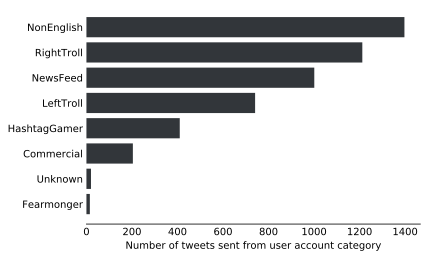

In [9]:
# reorder the series to reorder our bars
cat_counts = cat_counts.sort_values(ascending=True)

# initialize our figure and axes objects 
fig, ax = plt.subplots()

# draw the horizontal bars
ax.barh(cat_counts.index, cat_counts, color = '#32363A')

# add an xlabel 
ax.set_xlabel('Number of tweets sent from user account category')

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

plt.show()

## Dot Plots

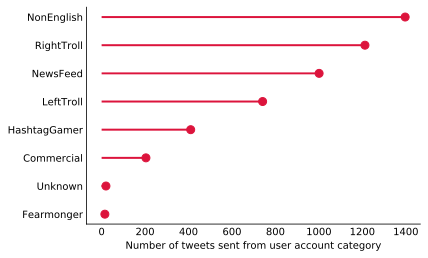

In [11]:
# reorder the series to reorder our bars
cat_counts = cat_counts.sort_values(ascending=True)

# initialize our figure and axes objects 
fig, ax = plt.subplots()

# draw the dots and horizontal lines
# this is the only part of this graph that differs from the horizontal bar chart above
ax.hlines(y=cat_counts.index, xmin=0, xmax=cat_counts, color='#32363A', linewidth=2)
ax.plot(cat_counts, cat_counts.index, "o", color='#32363A', markersize = 8)

# add an xlabel 
ax.set_xlabel('Number of tweets sent from user account category')

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

plt.show()

## Histograms & Kernel Density Estimates 



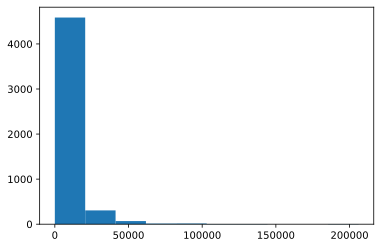

In [12]:
fig, ax = plt.subplots()
ax.hist(sampled['followers'])
plt.show()

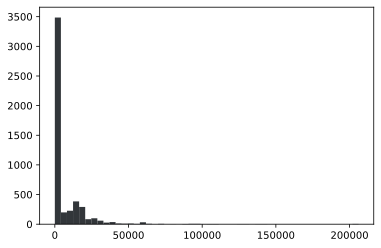

In [13]:
fig, ax = plt.subplots()
ax.hist(sampled['followers'], bins=50, color='#32363A')
plt.show()

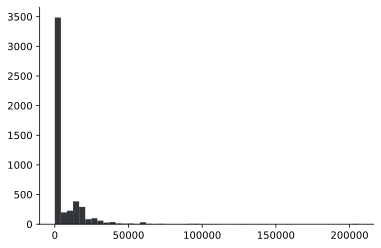

In [14]:
fig, ax = plt.subplots()

ax.hist(sampled['followers'], bins=50, color='#32363A')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

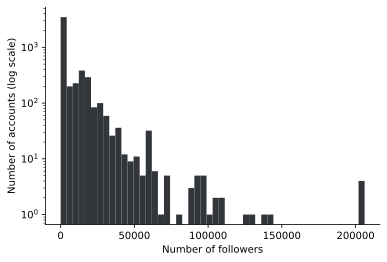

In [15]:
fig, ax = plt.subplots()

ax.hist(sampled['followers'], bins=50, color='#32363A')
ax.set_yscale('log')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Number of followers')
ax.set_ylabel('Number of accounts (log scale)')

plt.show()

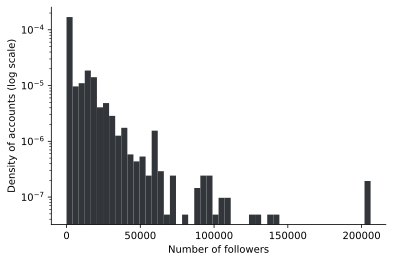

In [16]:
fig, ax = plt.subplots()

ax.hist(sampled['followers'], bins=50, color='#32363A', density=True)
ax.set_yscale('log')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Number of followers')
ax.set_ylabel('Density of accounts (log scale)')

plt.show()

Histograms are great, but bin sizes can change the distribution significantly. Alternatively, we can estimate the probability density function (which is a bit like a smoothed histogram). The area under the curve is 1. The probability of a value between $x1$ and $x2$ is the area under the curve between $x1$ and $x2$. 

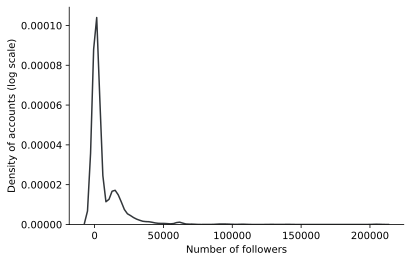

In [17]:
fig, ax = plt.subplots()

sns.distplot(sampled['followers'], hist=False, color='#32363A')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Number of followers')
ax.set_ylabel('Density of accounts (log scale)')

plt.show()

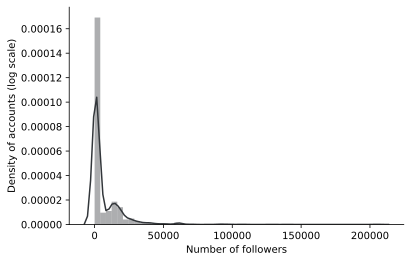

In [18]:
fig, ax = plt.subplots()

sns.distplot(sampled['followers'], hist=True, color='#32363A')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Number of followers')
ax.set_ylabel('Density of accounts (log scale)')

plt.show()

# Strip Plots

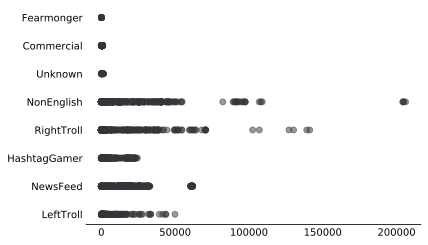

In [19]:
fig, ax = plt.subplots()
ax.scatter(sampled['followers'], sampled['account_category'], color='#32363A', alpha = .5)

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

plt.show()

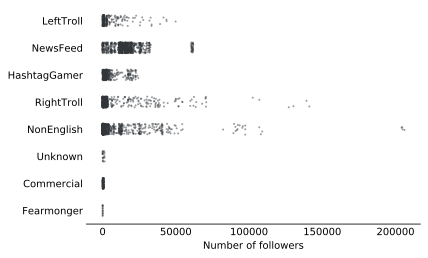

In [20]:
fig, ax = plt.subplots()
# matplotlib doesn't have a convenient jitter parameter, so we will use seaborn 
sns.stripplot(sampled['followers'], sampled['account_category'], color='#32363A', alpha = .5, jitter=0.2, size=2)

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

ax.set_ylabel('')
ax.set_xlabel('Number of followers')

plt.show()

## Boxplots

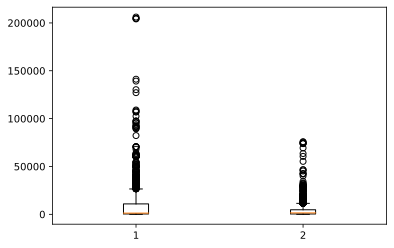

In [21]:
fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']])
plt.show()

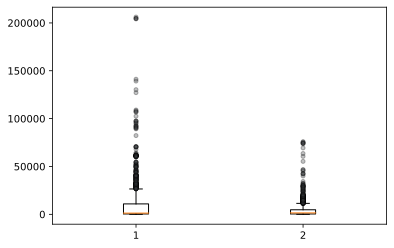

In [24]:
flierprops = dict(marker='o', markerfacecolor='#32363A', markersize=4,linestyle='none', alpha=.3)

fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], flierprops = flierprops)
plt.show()

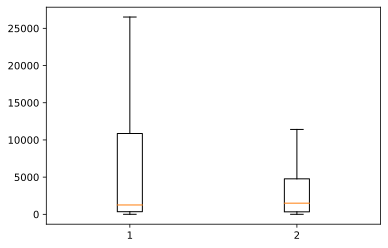

In [25]:
fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], showfliers=False)
plt.show()

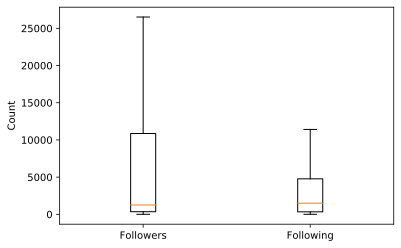

In [26]:
fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], showfliers=False)
ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count')
plt.show()

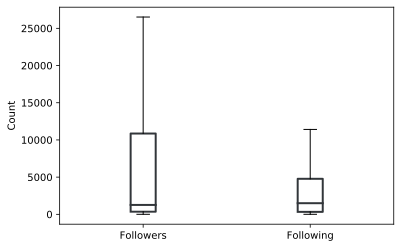

In [27]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], showfliers=False, medianprops=medianprops, boxprops=boxprops)
ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count')
plt.show()

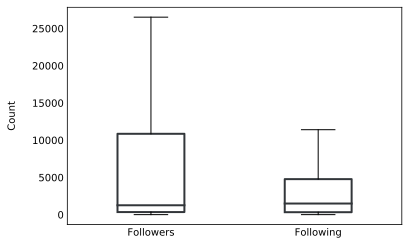

In [28]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], 
           showfliers=False, medianprops=medianprops, boxprops=boxprops, widths=.4)

ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count\n')

ax.tick_params(axis='both', which='both', length=0)

plt.show()

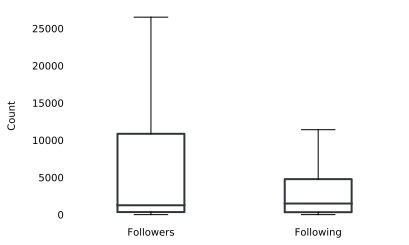

In [29]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], 
           showfliers=False, medianprops=medianprops, boxprops=boxprops, widths=.4)

ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count\n')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

plt.show()

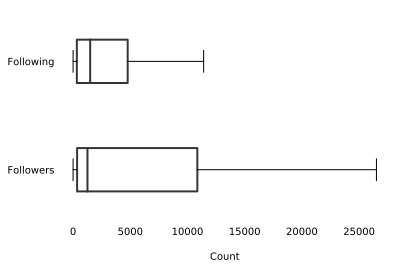

In [30]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()

# let's make these horizontal rather than vertical
ax.boxplot([sampled['followers'], sampled['following']], showfliers=False, 
           medianprops=medianprops, boxprops=boxprops, vert=False, widths=.4)

ax.set_yticklabels(['Followers', 'Following'])
ax.set_xlabel('\nCount')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

plt.show()

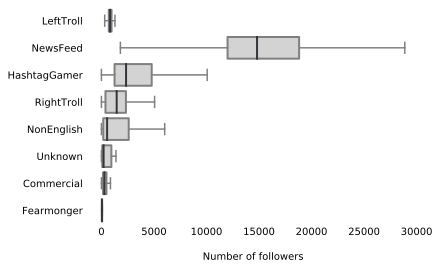

In [31]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2)

fig, ax = plt.subplots()

# this time we will use seaborn to simplify comparisons
sns.boxplot(x=sampled['followers'], y=sampled['account_category'], orient="h", color='lightgray', 
            showfliers=False, medianprops = medianprops, boxprops = boxprops)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

ax.set_xlabel('\nNumber of followers')
ax.set_ylabel('')

plt.show()

In [32]:
wo_newsfeed = sampled[sampled['account_category'] != "NewsFeed"]

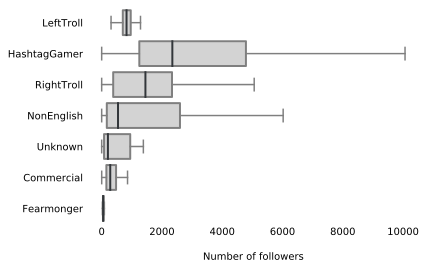

In [33]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2)

fig, ax = plt.subplots()

# this time we will use seaborn to simplify comparisons
sns.boxplot(x=wo_newsfeed['followers'], y=wo_newsfeed['account_category'], orient="h", color='lightgray', 
            showfliers=False, medianprops = medianprops, boxprops = boxprops)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

ax.set_xlabel('\nNumber of followers')
ax.set_ylabel('')

plt.show()

#  <i class="fa fa-location-arrow"></i>  RELATIONSHIPS <a id='relationships'></a>

## Scatterplots

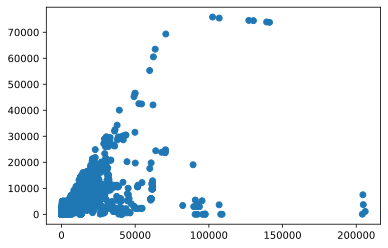

In [34]:
fig, ax = plt.subplots()
ax.scatter(sampled['followers'], sampled['following'])
plt.show()

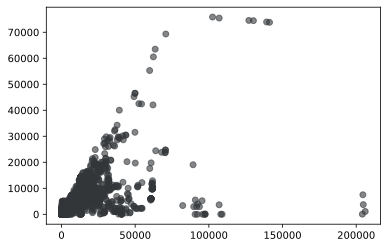

In [35]:
fig, ax = plt.subplots()
ax.scatter(sampled['followers'], sampled['following'], alpha=.6, color='#32363A')
plt.show()

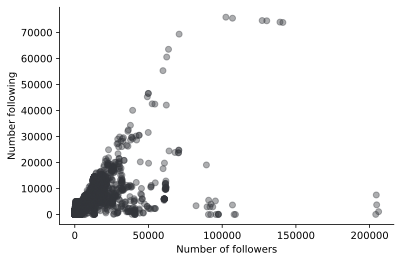

In [36]:
fig, ax = plt.subplots()
ax.scatter(sampled['followers'], sampled['following'], alpha=.4, color='#32363A')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Number of followers')
ax.set_ylabel('Number following')

plt.show()

# <i class="fa fa-location-arrow"></i> TIME SERIES <a id='time'></a>

## Line Graphs 
    
* Recall the material from yesterday on `Datetime` objects in `pandas`. 
* "Resampling" `datetime` objects
    * <font color="crimson">"Resampling"</font> is the process of converting a time series from one level to another. 
        * <font color="crimson">upsampling</font>: aggregates dates / times 
        * <font color="crimson">downsampling</font>: disaggregates dates / times 

In [37]:
sampled['publish_date']

55466        4/1/2017 8:14
208401       9/1/2015 2:19
110240     5/16/2016 15:15
175624      1/25/2016 9:54
82468     10/16/2016 16:51
                ...       
59623      10/14/2016 2:09
91342      10/6/2016 23:21
231622    12/22/2015 12:29
70450     12/24/2016 16:02
98315        1/1/2017 1:49
Name: publish_date, Length: 5000, dtype: object

In [38]:
dt = pd.to_datetime(sampled['publish_date'].tolist())
type(dt)

pandas.core.indexes.datetimes.DatetimeIndex

In [39]:
dt

DatetimeIndex(['2017-04-01 08:14:00', '2015-09-01 02:19:00',
               '2016-05-16 15:15:00', '2016-01-25 09:54:00',
               '2016-10-16 16:51:00', '2015-09-18 12:56:00',
               '2016-12-28 17:27:00', '2016-07-31 17:30:00',
               '2014-11-10 13:45:00', '2017-01-01 14:43:00',
               ...
               '2016-08-16 09:26:00', '2015-08-03 04:11:00',
               '2017-05-19 06:23:00', '2015-08-12 10:13:00',
               '2016-09-16 18:39:00', '2016-10-14 02:09:00',
               '2016-10-06 23:21:00', '2015-12-22 12:29:00',
               '2016-12-24 16:02:00', '2017-01-01 01:49:00'],
              dtype='datetime64[ns]', length=5000, freq=None)

In [40]:
dt.day

Int64Index([ 1,  1, 16, 25, 16, 18, 28, 31, 10,  1,
            ...
            16,  3, 19, 12, 16, 14,  6, 22, 24,  1],
           dtype='int64', length=5000)

In [41]:
dt.week

Int64Index([13, 36, 20,  4, 41, 38, 52, 30, 46, 52,
            ...
            33, 32, 20, 33, 37, 41, 40, 52, 51, 52],
           dtype='int64', length=5000)

In [42]:
dt.year

Int64Index([2017, 2015, 2016, 2016, 2016, 2015, 2016, 2016, 2014, 2017,
            ...
            2016, 2015, 2017, 2015, 2016, 2016, 2016, 2015, 2016, 2017],
           dtype='int64', length=5000)

In [43]:
sampled['Year'] = dt.year
sampled['Month'] = dt.month
sampled['Day'] = dt.day

In [44]:
grouped = sampled.groupby(['Year', 'Month', 'Day']).size().sort_values(ascending=False).reset_index()

grouped = grouped.rename(
    columns={0:'Number of (sampled) tweets'}
)

grouped = grouped.sort_values(['Year', 'Month', 'Day'], ascending=True)

In [45]:
grouped.sample(20)

Year  Month  Day  Number of (sampled) tweets
551  2016      7   18                           4
479  2015     12   27                           4
596  2016      1   27                           3
763  2017     12    9                           2
496  2016      2    1                           4
891  2015      6   13                           1
898  2017      8   23                           1
426  2016     11    4                           5
470  2017      4   30                           5
919  2017     11   26                           1
777  2015      2   26                           2
815  2016      8   25                           2
923  2017     11   15                           1
474  2017      7   24                           4
343  2017      9   15                           6
267  2017      4   21                           7
58   2015     11   25                          11
685  2017      9    9                           3
527  2016     11    3                           4
433  2015      7    5                           5

We will produce this plot with the full `dataframe`, so it will take a bit of time. 

Perhaps a good time to take a break for tea and coffee. ☕️☕️☕️

In [46]:
df['Datetime'] = pd.to_datetime(df['publish_date'])
df = df.set_index('Datetime')

Various ways to group by time. See the `pandas` timeseries documentation for further details. 

| Value | Description                                  |
|:------|:---------------------------------------------|
| B     | business day frequency                       |
| C     | custom business day frequency (experimental) |
| D     | calendar day frequency                       |
| W     | weekly frequency                             |
| M     | month end frequency                          |
| BM    | business month end frequency                 |
| CBM   | custom business month end frequency          |
| MS    | month start frequency                        |
| BMS   | business month start frequency               |
| CBMS  | custom business month start frequency        |
| Q     | quarter end frequency                        |
| BQ    | business quarter endfrequency                |
| QS    | quarter start frequency                      |
| BQS   | business quarter start frequency             |
| A     | year end frequency                           |
| BA    | business year end frequency                  |
| AS    | year start frequency                         |
| BAS   | business year start frequency                |
| BH    | business hour frequency                      |
| H     | hourly frequency                             |
| T     | minutely frequency                           |
| S     | secondly frequency                           |
| L     | milliseonds                                  |
| U     | microseconds                                 |
| N     | nanosecondsa                                 |

# ☕️ ☕️ ☕️ Tea / Coffee Break 

In [47]:
grouped_cal_day = df.resample('D').size() # group by calendar day and count the number of tweets

In [48]:
grouped_cal_day

Datetime
2012-02-02     4
2012-02-03     0
2012-02-04     1
2012-02-05     1
2012-02-06     3
              ..
2018-05-26    44
2018-05-27    49
2018-05-28    43
2018-05-29    49
2018-05-30    32
Freq: D, Length: 2310, dtype: int64

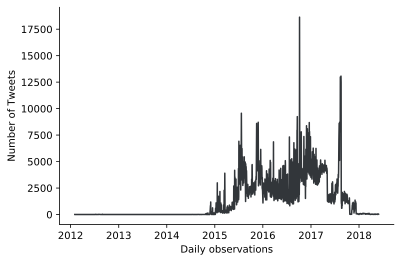

In [49]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots()
ax.plot(grouped_cal_day, color='#32363A')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Daily observations')
ax.set_ylabel('Number of Tweets')

plt.show()

In [50]:
weekly = df.resample('W').size()
weekly

Datetime
2012-02-05      6
2012-02-12     14
2012-02-19      5
2012-02-26     11
2012-03-04      1
             ... 
2018-05-06    178
2018-05-13    150
2018-05-20    145
2018-05-27    346
2018-06-03    124
Freq: W-SUN, Length: 331, dtype: int64

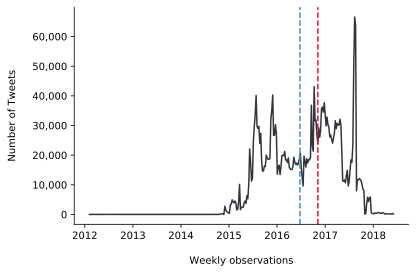

In [51]:
fig, ax = plt.subplots()
ax.plot(weekly, color='#32363A')

# add a vertical line for the 2016 US Presidential election 
ax.axvline(pd.to_datetime('2016-11-06'), color='crimson', linestyle='--', lw=1.5)
# add a veritcal line for the 2016 Brexit referendum 
ax.axvline(pd.to_datetime('2016-06-23'), color='#398ECF', linestyle='--', lw=1.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('\nWeekly observations')
ax.set_ylabel('Number of Tweets\n')

# this unpleasant line gives us some nicely formatted numbers for the y axis labels 
# lamda functions are beyond the scope of this week long course 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

# <i class="fa fa-location-arrow"></i> ANNOTATIONS <a id='annotations'></a>

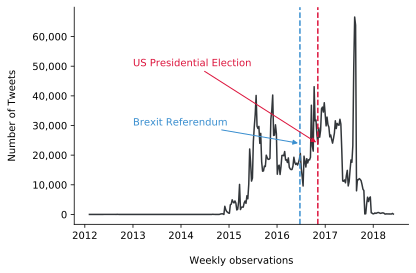

In [52]:
fig, ax = plt.subplots()
ax.plot(weekly, color='#32363A')

# # add a vertical line for the 2016 US Presidential election 
ax.axvline(pd.to_datetime('2016-11-06'), color='crimson', linestyle='--', lw=1.5)
# # add a veritcal line for the 2016 Brexit referendum 
ax.axvline(pd.to_datetime('2016-06-23'), color='#398ECF', linestyle='--', lw=1.5)

# text annotations
ax.annotate('US Presidential Election', 
            xytext=[pd.Timestamp('2013'),50000],
            xy=[pd.to_datetime('2016-11-06'), weekly.loc[pd.to_datetime('2016-11-06')]], color='crimson', 
            arrowprops={"arrowstyle":"-|>", "color":"crimson"})

ax.annotate('Brexit Referendum', 
            xytext=[pd.Timestamp('2013'),30000],
            xy=[pd.to_datetime('2016-06-23'), weekly.loc[pd.to_datetime('2016-11-06')]], color='#398ECF', 
            arrowprops={"arrowstyle":"-|>", "color":"#398ECF"})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('\nWeekly observations')
ax.set_ylabel('Number of Tweets\n')

# this unpleasant line gives us some nicely formatted numbers for the y axis labels 
# lamda functions are beyond the score of this week long course 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

# <i class="fa fa-location-arrow"></i> SMALL MULTIPLES & PAIR PLOTS<a id='multiples'></a>

In [53]:
df['language'].value_counts().head(11)

English               2116867
Russian                610943
German                  86983
Ukrainian               38669
Italian                 18063
Serbian                  9480
Uzbek                    9334
Bulgarian                9236
LANGUAGE UNDEFINED       8320
Arabic                   7588
Macedonian               5178
Name: language, dtype: int64

In [55]:
by_lang = df.groupby('language')
by_lang

In [57]:
def get_resampled_lang(DFGB, language, resample_freq):
    df = DFGB.get_group(language).resample(resample_freq).size()
    return df

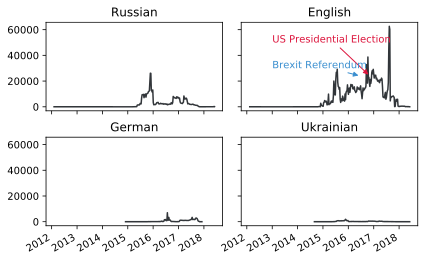

In [59]:
# two rows, two columns 
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)

axs[0,0].set_title('Russian')
axs[0,0].plot(get_resampled_lang(by_lang, 'Russian', 'W'), color='#32363A')

axs[0,1].set_title('English')
axs[0,1].plot(get_resampled_lang(by_lang, 'English', 'W'), color='#32363A')
axs[0,1].annotate('US Presidential Election', 
            xytext=[pd.Timestamp('2013'),50000],
            xy=[pd.to_datetime('2016-11-06'), weekly.loc[pd.to_datetime('2016-11-06')]], color='crimson', 
            arrowprops={"arrowstyle":"-|>", "color":"crimson"})
axs[0,1].annotate('Brexit Referendum', 
            xytext=[pd.Timestamp('2013'),30000],
            xy=[pd.to_datetime('2016-06-23'), weekly.loc[pd.to_datetime('2016-11-06')]], color='#398ECF', 
            arrowprops={"arrowstyle":"-|>", "color":"#398ECF"})

axs[1,0].set_title('German')
axs[1,0].plot(get_resampled_lang(by_lang, 'German', 'W'), color='#32363A')

axs[1,1].set_title('Ukrainian')
axs[1,1].plot(get_resampled_lang(by_lang, 'Ukrainian', 'W'), color='#32363A')

plt.tight_layout() # adds a bit of space between plots
fig.autofmt_xdate() # rotates the x-axis labels 
# plt.xticks(rotation=45) # something like this would also work

plt.show()


This time without shared axes. 

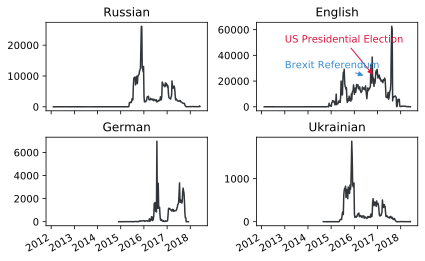

In [61]:
# three rows, two columns 
fig, axs = plt.subplots(2, 2, sharey=False, sharex=True)

axs[0,0].set_title('Russian')
axs[0,0].plot(get_resampled_lang(by_lang, 'Russian', 'W'), color='#32363A')

axs[0,1].set_title('English')
axs[0,1].plot(get_resampled_lang(by_lang, 'English', 'W'), color='#32363A')
axs[0,1].annotate('US Presidential Election', 
            xytext=[pd.Timestamp('2013'),50000],
            xy=[pd.to_datetime('2016-11-06'), weekly.loc[pd.to_datetime('2016-11-06')]], color='crimson', 
            arrowprops={"arrowstyle":"-|>", "color":"crimson"})
axs[0,1].annotate('Brexit Referendum', 
            xytext=[pd.Timestamp('2013'),30000],
            xy=[pd.to_datetime('2016-06-23'), weekly.loc[pd.to_datetime('2016-11-06')]], color='#398ECF', 
            arrowprops={"arrowstyle":"-|>", "color":"#398ECF"})

axs[1,0].set_title('German')
axs[1,0].plot(get_resampled_lang(by_lang, 'German', 'W'), color='#32363A')

axs[1,1].set_title('Ukrainian')
axs[1,1].plot(get_resampled_lang(by_lang, 'Ukrainian', 'W'), color='#32363A')

plt.tight_layout() # adds a bit of space between plots
fig.autofmt_xdate() # rotates the x-axis labels 
# plt.xticks(rotation=45) # something like this would also work

plt.show()


And here is another way of doing something similar, this time with three plots. 

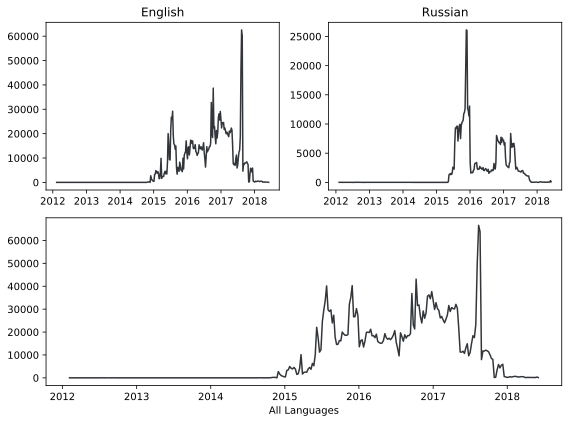

In [62]:
fig = plt.figure(figsize=(8, 6)) # we can change the figure dimentions here. 

ax1 = plt.subplot(212)
ax1.plot(weekly, color='#32363A')
ax1.set_xlabel('All Languages')

ax2 = plt.subplot(221)
ax2.plot(get_resampled_lang(by_lang, 'English', 'W'), color='#32363A')
ax2.set_title('English')

ax3 = plt.subplot(222)
ax3.plot(get_resampled_lang(by_lang, 'Russian', 'W'), color='#32363A')
ax3.set_title('Russian')

plt.tight_layout()
plt.show()

# <i class="fa fa-location-arrow"></i>  REFINING AND SAVING PLOTS FOR PUBLICATION <a id='publication'></a>

* raster graphics vs. vector graphics 
* `savefig()`
    * png with dpi parameter
    * jpg with quality parameter 
* pdf (for print)
* svg (for vector graphics on the web, for manual customization) 

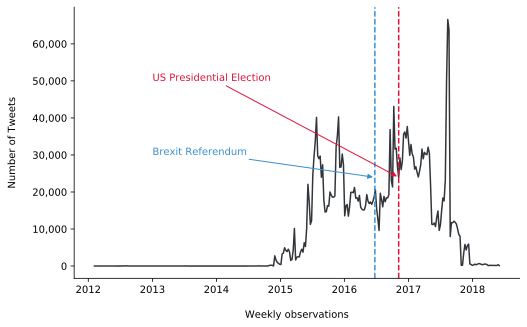

In [63]:
fig, ax = plt.subplots()

# we can set the aspect ratios in a slightly different way 
fig.set_figheight(5)
fig.set_figwidth(8)

ax.plot(weekly, color='#32363A')

# # add a vertical line for the 2016 US Presidential election 
ax.axvline(pd.to_datetime('2016-11-06'), color='crimson', linestyle='--', lw=1.5)
# # add a veritcal line for the 2016 Brexit referendum 
ax.axvline(pd.to_datetime('2016-06-23'), color='#398ECF', linestyle='--', lw=1.5)

# text annotations
ax.annotate('US Presidential Election', 
            xytext=[pd.Timestamp('2013'),50000],
            xy=[pd.to_datetime('2016-11-06'), weekly.loc[pd.to_datetime('2016-11-06')]], color='crimson', 
            arrowprops={"arrowstyle":"-|>", "color":"crimson"})

ax.annotate('Brexit Referendum', 
            xytext=[pd.Timestamp('2013'),30000],
            xy=[pd.to_datetime('2016-06-23'), weekly.loc[pd.to_datetime('2016-11-06')]], color='#398ECF', 
            arrowprops={"arrowstyle":"-|>", "color":"#398ECF"})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('\nWeekly observations')
ax.set_ylabel('Number of Tweets\n')

# this unpleasant line gives us some nicely formatted numbers for the y axis labels 
# lamda functions are beyond the score of this week long course 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# SAVE FOR THE WEB

## JPG: qual from 1 (worst) to 95 (best, but why bother with compression?)
plt.savefig('img/weekly_observations.jpg', quality=80) 

## PNG
plt.savefig('img/weekly_observations.png', dpi=300)

## SVG
plt.savefig('img/weekly_observations.svg')  # this is a vector graphic

# SAVE FOR PRINT

## PDF
plt.savefig('img/weekly_observations.pdf')  # this is a vector graphic

# we can still show
plt.show()